In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Predict Hair Fall.csv')

In [22]:
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for null values
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [25]:
# Dropping unnecesary columns
df.drop('Id',axis=1,inplace=True)

In [28]:
df['Medical Conditions'].unique()

array(['No Data', 'Eczema', 'Dermatosis', 'Ringworm', 'Psoriasis',
       'Alopecia Areata ', 'Scalp Infection', 'Seborrheic Dermatitis',
       'Dermatitis', 'Thyroid Problems', 'Androgenetic Alopecia'],
      dtype=object)

In [53]:
df.shape

(999, 12)

In [ ]:
for i in range(0,999):
    if df['Medical Conditions'][i] == 'No Data' and df['Medications & Treatments'][i] == 'No Data':
        df['Medical Conditions'][i] = 'No'
        df['Medications & Treatments'][i] = 'No'

In [52]:
df.head()

,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,Yes,No,No,No,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


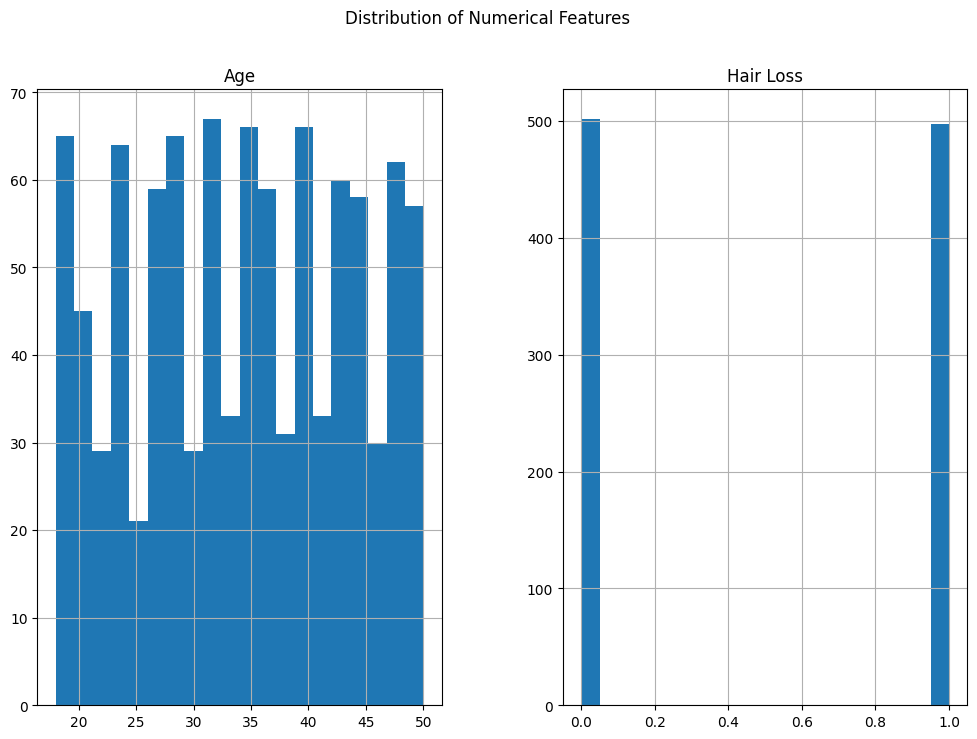

In [62]:
# Visualizing distribution of numerical variables
df.hist(figsize=(12, 8), bins=20)  # Histogram for each numeric column
plt.suptitle("Distribution of Numerical Features")
plt.show()

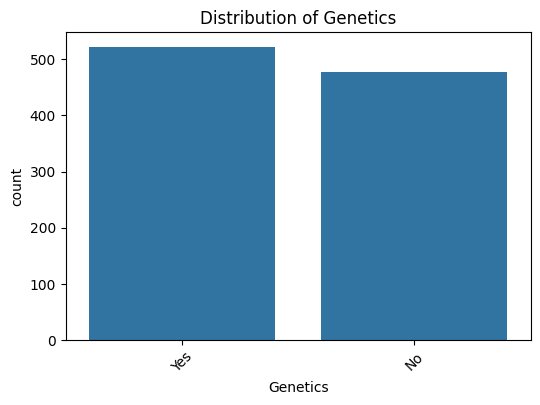

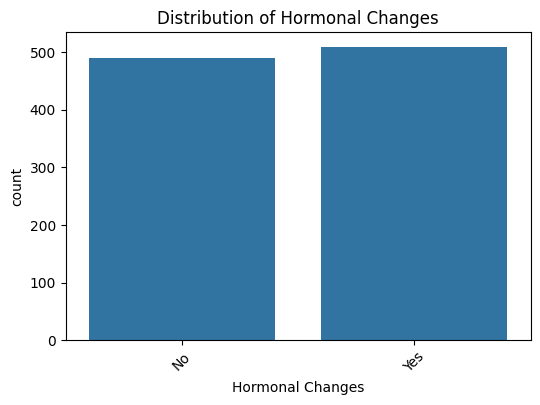

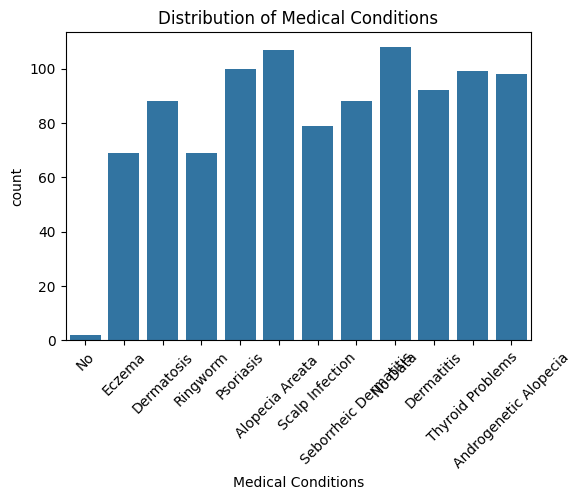

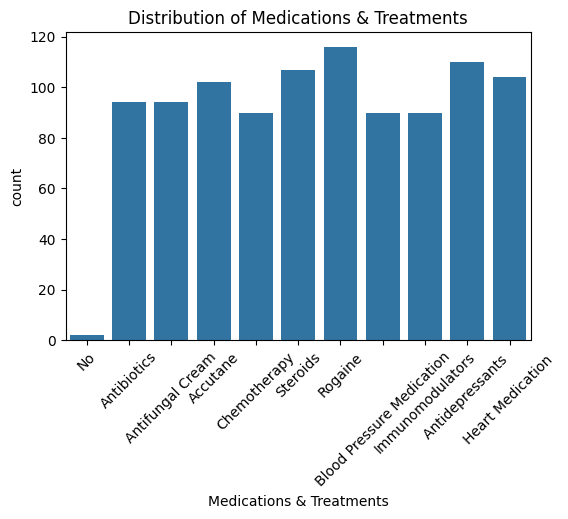

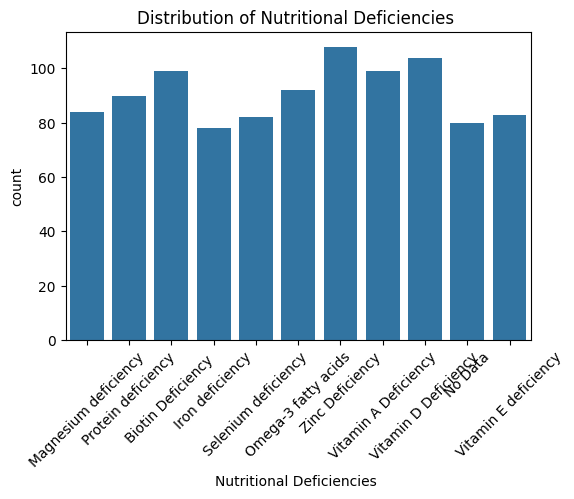

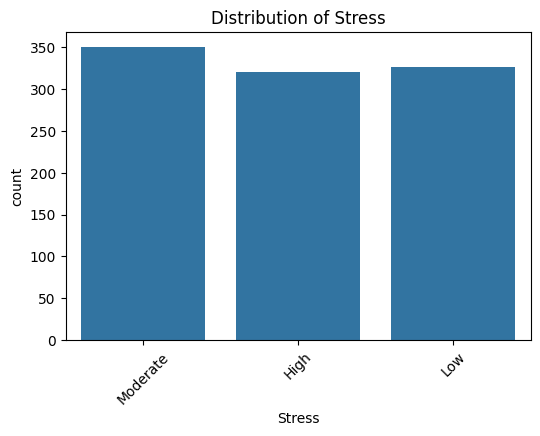

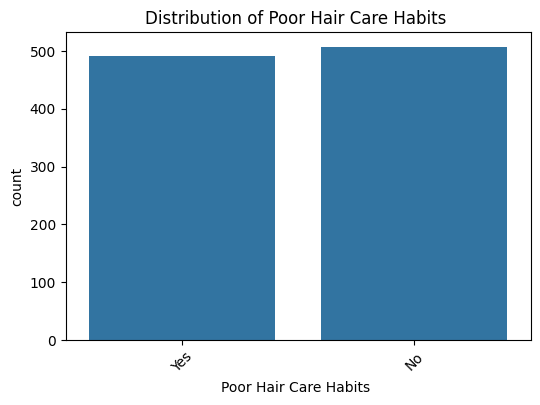

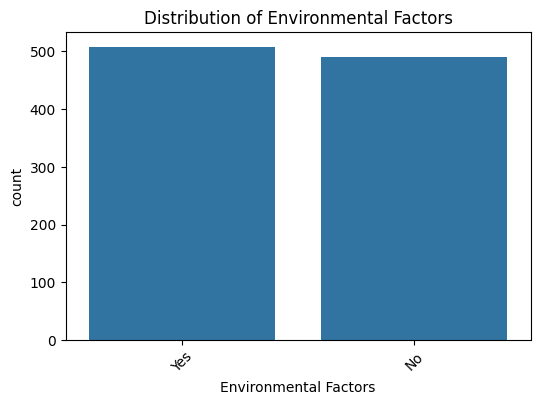

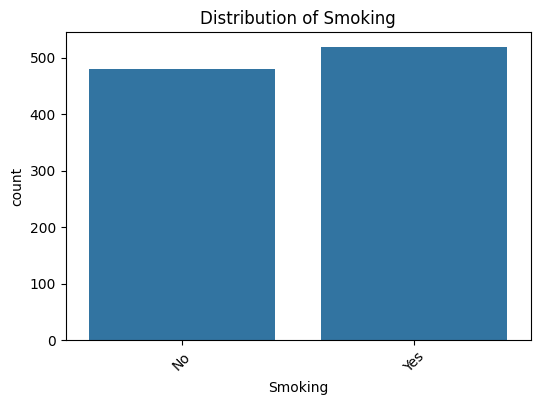

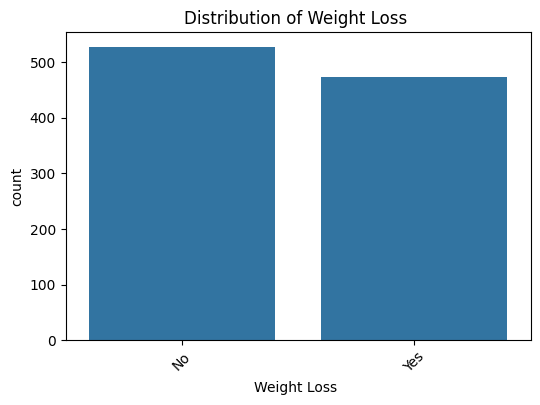

In [61]:
categorical_columns = df.select_dtypes(include=['object']).columns  # Identifying categorical columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()